# APIを使って作画を試みる。

In [1]:
import requests
import json

url="http://localhost:8088/tile/kanagawa/2024-09-08T06:00/12"
res = requests.get(url)
payload = json.loads(res.text)
data = payload["data"]
spec = payload["spec"]
data, spec



({'XY': [[3628, 1613],
   [3629, 1613],
   [3630, 1613],
   [3631, 1613],
   [3632, 1613],
   [3633, 1613],
   [3634, 1613],
   [3635, 1613],
   [3636, 1613],
   [3637, 1613],
   [3638, 1613],
   [3628, 1614],
   [3629, 1614],
   [3630, 1614],
   [3631, 1614],
   [3632, 1614],
   [3633, 1614],
   [3634, 1614],
   [3635, 1614],
   [3636, 1614],
   [3637, 1614],
   [3638, 1614],
   [3628, 1615],
   [3629, 1615],
   [3630, 1615],
   [3631, 1615],
   [3632, 1615],
   [3633, 1615],
   [3634, 1615],
   [3635, 1615],
   [3636, 1615],
   [3637, 1615],
   [3638, 1615],
   [3628, 1616],
   [3629, 1616],
   [3630, 1616],
   [3631, 1616],
   [3632, 1616],
   [3633, 1616],
   [3634, 1616],
   [3635, 1616],
   [3636, 1616],
   [3637, 1616],
   [3638, 1616],
   [3628, 1617],
   [3629, 1617],
   [3630, 1617],
   [3631, 1617],
   [3632, 1617],
   [3633, 1617],
   [3634, 1617],
   [3635, 1617],
   [3636, 1617],
   [3637, 1617],
   [3638, 1617],
   [3628, 1618],
   [3629, 1618],
   [3630, 1618],
   [3631

In [3]:
import numpy as np
from logging import getLogger, basicConfig, INFO, DEBUG
from folium import Map, LayerControl  # , Choropleth, FeatureGroup
from map import map_layer

basicConfig(level=INFO)

# レイヤごとに作画する
layers = []
for item in spec["items"]:
    values = np.array(data[item])

    # 新しいFoliumレイヤを定義する
    layers.append(map_layer("kanagawa", values.reshape(len(spec["Y"]), len(spec["X"])), item, spec[item]["range"]))

# 地図の中心位置
center = np.mean(spec["lat"]), np.mean(spec["lon"])

# 地図を作る
m = Map(center, zoom_start=10)

# レイヤをオーバーレイする
for layer in layers:
    layer.add_to(m)

# 切り替えボタン(もっと見易くしたい)
LayerControl().add_to(m)

# 表示
m

2024-09-10 19:43:38.228829: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-10 19:43:38.245926: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-10 19:43:38.251182: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-10 19:43:38.264933: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-10 19:43:39.119036: W tensorflow/compiler/tf2

# 測定局ごとの生の値

In [4]:
import requests
import json

url="http://localhost:8088/raw/kanagawa/2024-09-08T06:00"
res = requests.get(url)
payload = json.loads(res.text)
data = payload["data"]
spec = payload["spec"]
data, spec


({'SO2': {'14204010': 0.0,
   '14208020': nan,
   '14210010': 0.0,
   '14212020': 1.0,
   '14213010': 2.0,
   '14215010': nan,
   '14216020': nan,
   '14218010': nan,
   '14401010': nan,
   '14207010': 1.0,
   '14211010': 2.0,
   '14214020': nan,
   '14217020': 2.0,
   '14206010': 2.0,
   '14212520': nan,
   '14213510': nan,
   '14207510': nan,
   '14211510': nan,
   '14214510': nan,
   '14382010': 3.0,
   '14204530': nan,
   '14321010': nan,
   '14212530': nan,
   '14206520': nan,
   '14101010': 1.0,
   '14101020': nan,
   '14102010': 1.0,
   '14104030': 2.0,
   '14103010': 2.0,
   '14105020': 2.0,
   '14106010': 2.0,
   '14107010': 2.0,
   '14108020': 1.0,
   '14109040': 2.0,
   '14110050': 2.0,
   '14111020': 1.0,
   '14112020': 1.0,
   '14113020': 1.0,
   '14114020': 2.0,
   '14115010': 1.0,
   '14116010': 2.0,
   '14117010': 1.0,
   '14118010': 1.0,
   '14101520': nan,
   '14103510': nan,
   '14107520': nan,
   '14110510': nan,
   '14111520': nan,
   '14112510': nan,
   '14113510'

# 予測と実測の比較
例にならい、横軸に実測、縦軸に実測-予測。すべての格子点の、8時間後の予測値に関して。

In [5]:
import requests
import json

url="http://localhost:8088/ox/kanagawa/2024-09-06T06:00+09:00/12"
res = requests.get(url)
payload = json.loads(res.text)
data = payload["data"]
spec = payload["spec"]
data, spec



({'XY': [[3628, 1613],
   [3629, 1613],
   [3630, 1613],
   [3631, 1613],
   [3632, 1613],
   [3633, 1613],
   [3634, 1613],
   [3635, 1613],
   [3636, 1613],
   [3637, 1613],
   [3638, 1613],
   [3628, 1614],
   [3629, 1614],
   [3630, 1614],
   [3631, 1614],
   [3632, 1614],
   [3633, 1614],
   [3634, 1614],
   [3635, 1614],
   [3636, 1614],
   [3637, 1614],
   [3638, 1614],
   [3628, 1615],
   [3629, 1615],
   [3630, 1615],
   [3631, 1615],
   [3632, 1615],
   [3633, 1615],
   [3634, 1615],
   [3635, 1615],
   [3636, 1615],
   [3637, 1615],
   [3638, 1615],
   [3628, 1616],
   [3629, 1616],
   [3630, 1616],
   [3631, 1616],
   [3632, 1616],
   [3633, 1616],
   [3634, 1616],
   [3635, 1616],
   [3636, 1616],
   [3637, 1616],
   [3638, 1616],
   [3628, 1617],
   [3629, 1617],
   [3630, 1617],
   [3631, 1617],
   [3632, 1617],
   [3633, 1617],
   [3634, 1617],
   [3635, 1617],
   [3636, 1617],
   [3637, 1617],
   [3638, 1617],
   [3628, 1618],
   [3629, 1618],
   [3630, 1618],
   [3631

In [6]:
obs = []
for hr in range(1,9):
    url=f"http://localhost:8088/tile/kanagawa/2024-09-07T{6+hr:02d}:00+09:00/12"
    res = requests.get(url)
    obs.append(json.loads(res.text)["data"]["OX"])

obs = np.array(obs).T
obs

array([[  9.3251688 ,  16.64489217,  30.44018228,  45.98230777,
         54.66299615,  58.51136297,  64.96882574,  67.74642362],
       [  7.64055755,  15.47815518,  29.87146018,  45.6578764 ,
         52.70867023,  58.12834604,  65.45353836,  68.50471976],
       [  6.65690252,  14.86041056,  29.49309736,  45.57082124,
         51.54406716,  58.78559619,  66.84201387,  70.20096967],
       [ 11.51691261,  18.84460133,  31.30270835,  47.0885041 ,
         55.3020135 ,  65.08309111,  72.32227574,  75.64455147],
       [ 19.52280683,  25.64526872,  36.66602807,  49.1561192 ,
         57.91107363,  66.71389025,  70.96597737,  72.56456906],
       [ 23.71273425,  32.74032945,  45.56109614,  56.87126036,
         68.15617775,  75.71104073,  77.194048  ,  77.01885658],
       [ 25.24898282,  35.56523173,  51.67091028,  62.91899641,
         70.96248424,  77.23614202,  76.97532504,  81.08100359],
       [ 21.10024595,  30.10024595,  47.88536687,  63.81804894,
         74.13036619,  79.4426834

Text(0, 0.5, 'Predicted OX, ppb')

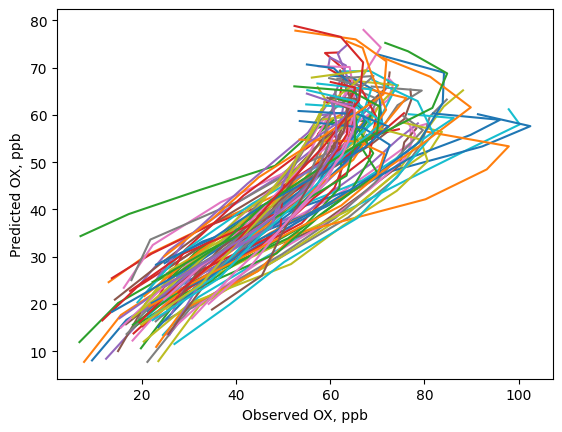

In [7]:
import matplotlib.pyplot as plt
import numpy as np

Y = np.zeros_like(obs)
for hr in range(1,9):
    Y[:,hr-1]= data[f"+{hr}"]

for row in range(len(obs)):
    plt.plot(obs[row],Y[row], "-")
    
plt.xlabel("Observed OX, ppb")
plt.ylabel("Predicted OX, ppb")
